In [1]:
from PIL import Image
 
image = Image.open("pillow_test/DSC_5011.jpg")
 
image.convert("1").save("pillow_test/1_1-bit-pixels.png")
image.convert("L").save("pillow_test/L_8-bit-grayscale.png")
image.convert("P").save("pillow_test/P_8-bit-colors.png")

In [16]:
import os, shutil
import os.path

# The directory where we will
# store our smaller dataset
base_dir = '/Users/kaoru/Documents/Python_Keras_book_github/cats_and_dogs_small'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')




In [17]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [19]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [20]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print('train_datagen = ', train_datagen)

print('train_dir = ', train_dir)
# /Users/kaoru/Documents/Python_Keras_book_github/cats_and_dogs_small/train

print('validation_dir = ', validation_dir)
# /Users/kaoru/Documents/Python_Keras_book_github/cats_and_dogs_small/validation

train_generator = train_datagen.flow_from_directory (
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

print('train_generator = ', train_generator)

train_datagen =  <keras_preprocessing.image.ImageDataGenerator object at 0xb2d7ca8d0>
train_dir =  /Users/kaoru/Documents/Python_Keras_book_github/cats_and_dogs_small/train
validation_dir =  /Users/kaoru/Documents/Python_Keras_book_github/cats_and_dogs_small/validation
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
train_generator =  <keras_preprocessing.image.DirectoryIterator object at 0xb2d7ca898>


In [21]:
for data_batch, labels_batch in train_generator:
    
    print('data_batch = ', data_batch)
    #print('labels_batch = ', labels_batch)
    #print('data batch shape:', data_batch.shape) # (20, 150, 150, 3)
    #print('labels batch shape:', labels_batch.shape) (20,)
    
    break

data_batch =  [[[[0.34901962 0.4039216  0.40784317]
   [0.28627452 0.32941177 0.3372549 ]
   [0.20392159 0.24313727 0.2509804 ]
   ...
   [0.11764707 0.1137255  0.03529412]
   [0.1137255  0.10196079 0.02745098]
   [0.09411766 0.07843138 0.07450981]]

  [[0.31764707 0.37254903 0.37647063]
   [0.18823531 0.23137257 0.2392157 ]
   [0.23137257 0.27058825 0.2784314 ]
   ...
   [0.1137255  0.12156864 0.07058824]
   [0.12156864 0.13725491 0.08235294]
   [0.1137255  0.12156864 0.03921569]]

  [[0.10588236 0.16078432 0.16470589]
   [0.1137255  0.15686275 0.16470589]
   [0.13725491 0.1764706  0.18431373]
   ...
   [0.14901961 0.16862746 0.15294118]
   [0.07843138 0.1137255  0.09411766]
   [0.09803922 0.10196079 0.07843138]]

  ...

  [[0.33333334 0.27058825 0.18039216]
   [0.34117648 0.2784314  0.18823531]
   [0.3529412  0.2901961  0.20000002]
   ...
   [0.2627451  0.23137257 0.18039216]
   [0.25882354 0.22352943 0.16470589]
   [0.24313727 0.20784315 0.14117648]]

  [[0.37254903 0.30980393 0.219

In [22]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 849s 8s/step - loss: 0.6912 - acc: 0.5400 - val_loss: 0.6790 - val_acc: 0.5700
Epoch 2/30
100/100 [==============================] - 865s 9s/step - loss: 0.6565 - acc: 0.6230 - val_loss: 0.6272 - val_acc: 0.6630
Epoch 3/30
100/100 [==============================] - 827s 8s/step - loss: 0.5985 - acc: 0.6805 - val_loss: 0.5924 - val_acc: 0.6860
Epoch 4/30
100/100 [==============================] - 819s 8s/step - loss: 0.5562 - acc: 0.7250 - val_loss: 0.6187 - val_acc: 0.6620
Epoch 5/30
100/100 [==============================] - 825s 8s/step - loss: 0.5309 - acc: 0.7380 - val_loss: 0.5783 - val_acc: 0.6950
Epoch 6/30
100/100 [==============================] - 873s 9s/step - loss: 0.4935 - acc: 0.7670 - val_loss: 0.5749 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 893s 9s/step - loss: 0.4677 - acc: 0.7695 - val_loss: 0.5675 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 913s 9s/step - 

In [23]:
model.save('cats_and_dogs_small_1.h5')

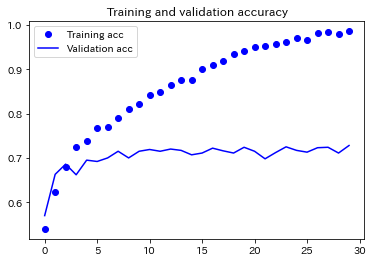

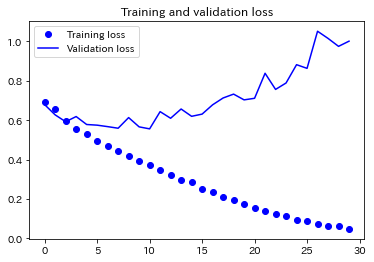

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

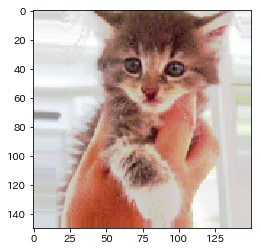

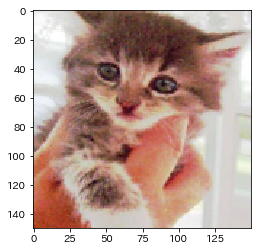

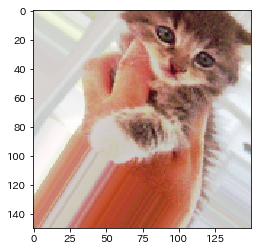

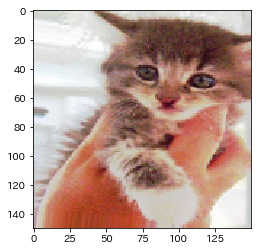

In [27]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 1273s 13s/step - loss: 0.6924 - acc: 0.5262 - val_loss: 0.7207 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 1245s 12s/step - loss: 0.6756 - acc: 0.5722 - val_loss: 0.7169 - val_acc: 0.5120
Epoch 3/100
100/100 [==============================] - 1183s 12s/step - loss: 0.6671 - acc: 0.5975 - val_loss: 0.6463 - val_acc: 0.5990
Epoch 4/100
100/100 [==============================] - 1251s 13s/step - loss: 0.6416 - acc: 0.6266 - val_loss: 0.6757 - val_acc: 0.5750
Epoch 5/100
100/100 [==============================] - 1400s 14s/step - loss: 0.6348 - acc: 0.6300 - val_loss: 0.6011 - val_acc: 0.6730
Epoch 6/100
100/100 [==============================] - 1402s 14s/step - loss: 0.6183 - acc: 0.6516 - val_loss: 0.6121 - val_acc: 0.6580
Epoch 7/100
100/100 [==============================] - 1406s 14s/step - loss: 0.6117 - acc: 0.6506 -

100/100 [==============================] - 1172s 12s/step - loss: 0.4369 - acc: 0.8000 - val_loss: 0.4577 - val_acc: 0.7830
Epoch 61/100
100/100 [==============================] - 1166s 12s/step - loss: 0.4043 - acc: 0.8184 - val_loss: 0.5417 - val_acc: 0.7550
Epoch 62/100
100/100 [==============================] - 1161s 12s/step - loss: 0.4239 - acc: 0.8025 - val_loss: 0.4534 - val_acc: 0.7910
Epoch 63/100
100/100 [==============================] - 1182s 12s/step - loss: 0.4175 - acc: 0.8097 - val_loss: 0.4677 - val_acc: 0.7720
Epoch 64/100
100/100 [==============================] - 1210s 12s/step - loss: 0.4185 - acc: 0.8078 - val_loss: 0.5032 - val_acc: 0.7720
Epoch 65/100
100/100 [==============================] - 1193s 12s/step - loss: 0.4083 - acc: 0.8119 - val_loss: 0.4248 - val_acc: 0.8090
Epoch 66/100
100/100 [==============================] - 1236s 12s/step - loss: 0.4347 - acc: 0.7937 - val_loss: 0.4468 - val_acc: 0.8060
Epoch 67/100
100/100 [==============================] 

In [30]:
model.save('cats_and_dogs_small_1.h5')

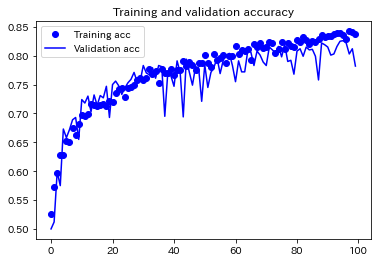

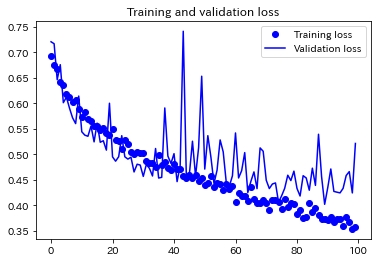

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
model.save('cats_and_dogs_small_2.h5')

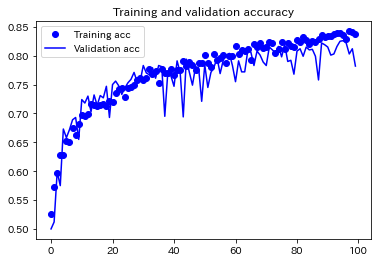

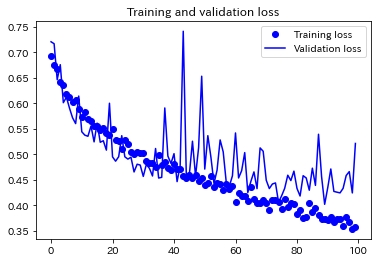

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()